## Работа с таблицами. Введение в библиотеку pandas

### Датафреймы (таблицы) в pandas

Таблицы можно получить из стандартных структур данных в Python. Например, мы можем создать таблицу в таком виде:

In [1]:
table = [[1, 2, 3], [4, 5, 6]]

In [2]:
table 

[[1, 2, 3], [4, 5, 6]]

Превратим `table` в датафрейм из библиотеки `pandas`. Эта библиотека используется для удобной и более эффективной работы с таблицами. 

In [1]:
import pandas as pd # импортируем саму библиотеку

In [4]:
pd.DataFrame(table) # Превратим список списков в объект `DataFrame`

,0,1,2
0,1,2,3
1,4,5,6


In [5]:
df = pd.DataFrame(table) # Сохраним результат в переменную df

In [6]:
df

,0,1,2
0,1,2,3
1,4,5,6


По умолчанию Python создает датафрейм по строкам, то есть в качестве первой строки берет первый список, затем ‒ второй, и так далее. При желании это можно исправить ‒ транспонировать таблицу, то есть поменять местами строки и столбцы. Для этого существует метод `.transpose()`:

In [7]:
df.transpose()

,0,1
0,1,4
1,2,5
2,3,6


In [10]:
df

,0,1,2
0,1,2,3
1,4,5,6


In [11]:
df[0] # столбец с индексом 0 - Series

0    1
1    4
Name: 0, dtype: int64

In [9]:
type(df[0])

pandas.core.series.Series

Столбец датафрейма `df` имеет особый тип *Series*. Внешне *Series* отличается от обычного списка значений, потому что, во-первых, при вызове столбца на экран выводятся не только сами элементы, но их номер (номер строки), а во-вторых, на экран выводится строка с названием столбца (`Name: 0`) и его тип (`dtype: int64`, целочисленный). Первая особенность роднит *Series* со словарями: он представляет собой пары *ключ-значение*, то есть *номер-значение*. Вторая особенность роднит *Series* с массивами `numpy`: элементы обычно должны быть одного типа.

### Загрузка таблицы из файла и описание переменных

Загрузим реальную базу данных (таблицу) из файла. Библиотека `pandas` достаточно гибкая, она позволяет загружать данные из файлов разных форматов. Пока остановимся на самом простом ‒ файле *csv*, что расшифровывается как *comma separated values*. Столбцы в таком файле по умолчанию отделяются друг от друга запятой. Например, такая таблица

In [12]:
pd.DataFrame([[1, 4, 9], [4, 8, 6]])

,0,1,2
0,1,4,9
1,4,8,6


сохраненная в формате *csv* без названий строк и столбцов будет выглядеть так:

Но разделитель столбцов в таблице может быть и другим, например, точкой с запятой:

В таких случаях потребуется дополнительно выставлять параметр `sep = ";"`, чтобы Python понимал, как правильно отделять один столбец от другого. Посмотрим, как загрузить файл с компьютера. По умолчанию Python видит только те файлы, которые хранятся в текущей рабочей папке ‒ папке, откуда запускается Python или, в нашем случае, Jupyter Notebook. Чтобы узнать, какая папка является рабочей, необходимо загрузить модуль `os` и вызвать функцию `getcwd()`:

In [3]:
import os

In [4]:
os.getcwd() # от get current working directory

'C:\\Users\\bred7\\Downloads\\vyatsu_labs_python\\Lab_6-7_lections'

Эта функция возвращает путь к рабочей папке. Обратите внимание: в Mac OS и Linux слэши между названиями папок прямые и одинарные, в Windows ‒ обратные и двойные. Плюс, в Windows всегда в начале прописывается диск (`C:` или иные).

Иногда удобно положить файл, с которым мы будем работать, в рабочую папку. Можно явно переместить файл из папки в папку, но при работе в Jupyter можно сделать проще ‒ воспользоваться кнопкой *Upload* на странице *Home*. Кто пользуется командной строкой, есть альтернатива: запустить сам Jupyter Notebook из той папки, где хранятся файлы для работы.

А так можно изменить рабочую папку, прописав новый путь:

In [15]:
os.chdir("C:\\Users\\proektor\\Лекция 6. Pandas")

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'C:\\Users\\proektor\\Лекция 6. Pandas'

In [16]:
os.getcwd()

'C:\\Users\\Анастасия\\Python\\Лекция 6. Pandas'

Теперь перейдем к загрузке самого файла. Воспользуемся функцией `read_csv()`. 

In [2]:
df = pd.read_csv("scores2.csv")

В файле `scores2.csv` сохранены оценки студентов-политологов по ряду курсов, имена студентов зашифрованы ‒ вместо них задействованы номера студенческих билетов. Посмотрим на базу данных:

In [3]:
df

,id,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
0,М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
1,М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
2,М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
3,М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
4,М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
5,М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
6,М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
7,М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
8,М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1
9,М141БПЛТЛ078,6,6,9,5,6,10,7,6.0,8,6,9,6.0,8,8.0,6,7,0


Так как в нашем случае таблица не очень большая, Python вывел ее на экран полностью. Если строк или столбцов было бы слишком много, Python вывел бы несколько первых и последних, а в середине бы поставил многоточие.

Кроме того, можно вывести первые или последние строки таблицы, используя методы `.head()` и `.tail()`.

In [4]:
df.head()

,id,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
0,М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
1,М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
2,М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
3,М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
4,М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


In [5]:
df.tail()

,id,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
55,М141БПЛТЛ043,5,5,6,5,8,5,6,5.0,6,4,5,4.0,5,NaN,4,6,0
56,М141БПЛТЛ084,6,7,8,4,8,5,5,NaN,8,4,4,4.0,4,4.0,6,7,1
57,М141БПЛТЛ005,5,7,5,5,7,4,7,4.0,5,4,5,5.0,4,4.0,4,8,1
58,М141БПЛТЛ044,4,5,7,4,6,4,4,5.0,4,4,4,4.0,6,NaN,5,5,1
59,13051038,5,4,4,4,9,5,5,5.0,5,4,4,NaN,7,4.0,4,4,1


Обратите внимание, что это просто первые и последние строки таблицы «как есть». Никакой сортировки не происходит! 

По умолчанию эти методы выводят пять строк, но при желании это легко изменить. Достаточно в скобках указать желаемое число строк.

In [6]:
df.head(10) # первые 10 строк

,id,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
0,М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
1,М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
2,М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
3,М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
4,М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
5,М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
6,М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
7,М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
8,М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1
9,М141БПЛТЛ078,6,6,9,5,6,10,7,6.0,8,6,9,6.0,8,8.0,6,7,0


**Описание показателей (переменных):**
    
* id ‒ номер студенческого билета
* catps	‒ оценка по курсу *Категории политической науки*
* mstat	‒ оценка по курсу *Математика и статистика*
* soc ‒	оценка по курсу *Социология*
* econ	‒ оценка по курсу *Экономика*
* eng	‒ оценка по курсу *Английский язык*
* polth	‒ оценка по курсу *История политических учений*
* mstat2	‒ оценка по курсу *Математика и статистика (часть 2)*
* phist	‒ оценка по курсу *Политическая история*
* law	‒ оценка по курсу *Право*
* phil	‒ оценка по курсу *Философия*
* polsoc	‒ оценка по курсу *Политическая социология*
* ptheo	‒ оценка по курсу *Политическая теория*
* preg	‒ оценка по курсу *Политическая регионалистика*
* compp	‒ оценка по курсу *Сравнительная политика*
* game	‒ оценка по курсу *Теория игр*
* wpol	‒ оценка по курсу *Мировая политика и международные отношения*
* male ‒ пол (1 ‒ мужской, 0 ‒ женский)

Давайте кое-что подкорректруем. Сделаем так, чтобы строки в таблице назывались в соответствии с `id`. Другими словами, сделаем так, чтобы первый столбец считался индексом строки:

In [7]:
df = pd.read_csv("scores2.csv", index_col = 0)

In [8]:
df # теперь выглядит так

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1


Иногда такой подход может быть полезен. Представьте, что все переменные в таблице, кроме *id*, измерены в количественной шкале, и мы планируем реализовать на них статистический метод, который работает исключительно с числовыми данными. Если мы просто выкинем столбец с *id*, мы потеряем информацию о наблюдении, если мы его оставим, нам придется собирать в отдельную таблицу показатели, к которым будем применять метод, так как сохраненный в исходной таблице текст будет мешать. Если же мы назовем строки в соответствии с *id*, то избавимся от столбца с текстом и не потеряем информацию о наблюдении (код, имя респондента, название страны и прочее).

 По таблице можно получить некоторую сводную информацию. Например, число переменных (столбцов) и наблюдений (строк), а также число заполненных значений. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, М141БПЛТЛ024 to 13051038
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   catps   60 non-null     int64  
 1   mstat   60 non-null     int64  
 2   soc     60 non-null     int64  
 3   econ    60 non-null     int64  
 4   eng     60 non-null     int64  
 5   polth   60 non-null     int64  
 6   mstat2  60 non-null     int64  
 7   phist   59 non-null     float64
 8   law     60 non-null     int64  
 9   phil    60 non-null     int64  
 10  polsoc  60 non-null     int64  
 11  ptheo   58 non-null     float64
 12  preg    60 non-null     int64  
 13  compp   57 non-null     float64
 14  game    60 non-null     int64  
 15  wpol    60 non-null     int64  
 16  male    60 non-null     int64  
dtypes: float64(3), int64(14)
memory usage: 8.4+ KB


Метод `.info()` выдал различную информацию. Во-первых, он сообщил, что `df` является объектом *DataFrame*. Во-вторых, он вывел число строк (`60 entries`) и показал их индексы (`М141БПЛТЛ024 to 13051038`). В-третьих, он вывел число столбцов (`total 17 columns`). Наконец, он выдал информацию по каждому столбцу. 

В выдаче выше представлено, сколько непустых элементов содержится в каждом столбце. Непустые элементы `non-null` ‒ это всё, кроме пропущенных значений, которые кодируются особым образом (`NaN` ‒ от  Not A Number). В нашей таблице почти все столбцы заполнены полностью: 60 ненулевых элементов из 60. Но есть столбцы с пропущенными значениями: *phist*, *ptheo*, *compp*.

Далее указан тип каждого столбца, целочисленный `int64` и с плавающей точкой`float64`. Числа в конце - это объем памяти, который требуется для хранения.

Сводную статистическую информацию можно получить с помощью метода `.describe()`.

In [10]:
df.describe()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,59.000000,60.000000,60.000000,60.000000,58.000000,60.000000,57.000000,60.000000,60.000000,60.000000
mean,6.700000,7.466667,7.216667,6.116667,8.350000,6.600000,7.033333,5.830508,6.866667,5.966667,7.183333,5.603448,6.700000,5.631579,6.250000,7.566667,0.450000
std,1.417804,1.578099,1.208608,1.718214,0.971195,1.638519,1.707081,1.662492,1.213856,1.850027,1.589069,1.413465,1.356716,1.422166,1.781496,1.430499,0.501692
min,4.000000,4.000000,4.000000,4.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
25%,6.000000,6.000000,6.000000,5.000000,8.000000,6.000000,6.000000,4.000000,6.000000,4.750000,6.000000,4.250000,6.000000,4.000000,5.000000,7.000000,0.000000
50%,7.000000,7.000000,7.000000,6.000000,8.000000,6.000000,7.000000,6.000000,7.000000,5.500000,7.000000,5.000000,7.000000,5.000000,6.000000,8.000000,0.000000
75%,7.250000,9.000000,8.000000,7.000000,9.000000,8.000000,8.000000,7.000000,8.000000,7.000000,8.000000,6.000000,8.000000,7.000000,7.250000,8.250000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,8.000000,8.000000,10.000000,10.000000,1.000000


В случае количественных показателей этот метод возвращает таблицу с основными описательными статистиками: 

* count ‒ число непустых (заполненных) значений
* mean ‒ среднее арифметическое
* std ‒ стандартное отклонение (показатель разброса данных относительно среднего значения)
* min ‒ миниммальное значение
* max ‒ максимальное значение
* 25% ‒ нижний квартиль (значение, которое 25% значений не превышают)
* 50% ‒ медиана (значение, которое 50% значений не превышают)
* 75% ‒ верхний квартиль (значение, которое 75% значений не превышают)

Когда таблица большая, увидеть все столбцы разом не получится. Поэтому полезно знать, как получить список названий столбцов.

In [11]:
df.columns

Index(['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist',
       'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol',
       'male'],
      dtype='object')

Обратите внимание: полученный объект не является обычным списком:

In [12]:
type(df.columns) # это Index из pandas

pandas.core.indexes.base.Index

Чтобы получить список названий, достаточно сконвертировать тип с помощью привычного `list()`: 

In [13]:
l = list(df.columns)
print(l)

['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist', 'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol', 'male']


Аналогичная история со строками: 

In [14]:
df.index

Index(['М141БПЛТЛ024', 'М141БПЛТЛ031', 'М141БПЛТЛ075', 'М141БПЛТЛ017',
       'М141БПЛТЛ069', 'М141БПЛТЛ072', 'М141БПЛТЛ020', 'М141БПЛТЛ026',
       'М141БПЛТЛ073', 'М141БПЛТЛ078', 'М141БПЛТЛ060', 'М141БПЛТЛ040',
       'М141БПЛТЛ065', 'М141БПЛТЛ053', 'М141БПЛТЛ015', 'М141БПЛТЛ021',
       'М141БПЛТЛ018', 'М141БПЛТЛ039', 'М141БПЛТЛ036', 'М141БПЛТЛ049',
       '06114043', 'М141БПЛТЛ048', 'М141БПЛТЛ034', 'М141БПЛТЛ045',
       'М141БПЛТЛ033', 'М141БПЛТЛ083', 'М141БПЛТЛ008', 'М141БПЛТЛ001',
       'М141БПЛТЛ038', 'М141БПЛТЛ052', 'М141БПЛТЛ011', 'М141БПЛТЛ004',
       'М141БПЛТЛ010', 'М141БПЛТЛ071', 'М141БПЛТЛ035', 'М141БПЛТЛ030',
       'М141БПЛТЛ070', 'М141БПЛТЛ051', 'М141БПЛТЛ046', 'М141БПЛТЛ047',
       'М141БПЛТЛ063', 'М141БПЛТЛ029', 'М141БПЛТЛ064', 'М141БПЛТЛ076',
       'М141БПЛТЛ062', 'М141БПЛТЛ074', '130232038', 'М141БПЛТЛ023',
       'М141БПЛТЛ054', 'М141БПЛТЛ012', 'М141БПЛТЛ006', 'М141БПЛТЛ055',
       'М141БПЛТЛ007', 'М141БПЛТЛ050', 'М141БПЛТЛ066', 'М141БПЛТЛ043',
       'М141Б

### Переименование столбцов и строк

Раз названия столбцов можно вывести в виде некоторого перечня, то этот перечень можно редактировать. 

In [15]:
df.columns

Index(['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist',
       'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol',
       'male'],
      dtype='object')

Давайте переименуем переменную `catps` в `cps`. Для этого сохраним названия в список `my_cols` и изменим в списке первый элемент:

In [16]:
my_cols = list(df.columns)
print(my_cols)
my_cols[0] = "cps"
print(my_cols)

['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist', 'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol', 'male']
['cps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist', 'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol', 'male']


In [17]:
df.columns = my_cols # сохраним изменения в самой базе df
df.columns # все обновилось!

Index(['cps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist', 'law',
       'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol', 'male'],
      dtype='object')

In [18]:
df

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1


Обратите внимание: для того, чтобы изменить одно или несколько названий, совсем необязательно создавать новый список «с нуля». Достаточно определить индексы нужных элементов и поправить только необходимые названия. 

Точно так же можно было поступить со строками. Но давайте лучше напишем функцию, которая будет делать все начальные буквы в названиях столбцов заглавными.

In [19]:
def rename_cols(df):
    oldnames = list(df.columns) # список старых названий 
    newnames = [i.capitalize() for i in oldnames] # список новых названий
    df.columns = newnames # сохранение изменений
    return df

Теперь применим нашу функцию `rename_cols()` к базе `df`:

In [20]:
df2 = rename_cols(df)
df2.head()

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Кажется, что таким способом мы сохранили изменения в новой базе `df2`, а старую базу `df` не тронули. Однако, если мы посмотрим на базу `df`, мы увидим, что она тоже изменилась!

In [21]:
df.head()

,Cps,Mstat,Soc,Econ,Eng,Polth,Mstat2,Phist,Law,Phil,Polsoc,Ptheo,Preg,Compp,Game,Wpol,Male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Это произошло, потому что датафреймы являются изменяемой структурой данных (как, например, списки). Поэтому, применяя методы к объекту типа `DataFrame`, мы меняем исходный датафрейм, и к этому надо быть готовым. Если вы не планируете вносить изменения в исходную базу, имеет смысл сделать ее копию и работать с ней. Например, вот так:

In [22]:
# метод copy
df_new = df.copy()

# вносим изменения в df_new - переименовываем один столбец
new_cols = list(df_new.columns)
new_cols[1] = "Matstat"
df_new.columns = new_cols

In [23]:
# сравниваем

print(df.head(2))
print("\n") # для пустой строчки между df и df_new
print(df_new.head(2))

              Cps  Mstat  Soc  Econ  Eng  Polth  Mstat2  Phist  Law  Phil  \
id                                                                          
М141БПЛТЛ024    7      9    8     8    9      8      10    8.0    7     9   
М141БПЛТЛ031    8     10   10    10   10     10      10    9.0    9    10   

              Polsoc  Ptheo  Preg  Compp  Game  Wpol  Male  
id                                                          
М141БПЛТЛ024       9    7.0     8    8.0     6    10     1  
М141БПЛТЛ031      10    9.0     8    8.0     9    10     1  


              Cps  Matstat  Soc  Econ  Eng  Polth  Mstat2  Phist  Law  Phil  \
id                                                                            
М141БПЛТЛ024    7        9    8     8    9      8      10    8.0    7     9   
М141БПЛТЛ031    8       10   10    10   10     10      10    9.0    9    10   

              Polsoc  Ptheo  Preg  Compp  Game  Wpol  Male  
id                                                          
М141БП

**Обратите внимание:** создать копию обычным присваиванием не получится, код вида `df_new = df`создаст новую ссылку на датафрейм, но не новый датафрейм. Поэтому при изменении `df_new` база `df` также изменится.

## Визуализация данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225B46C7488>,
      dtype=object)

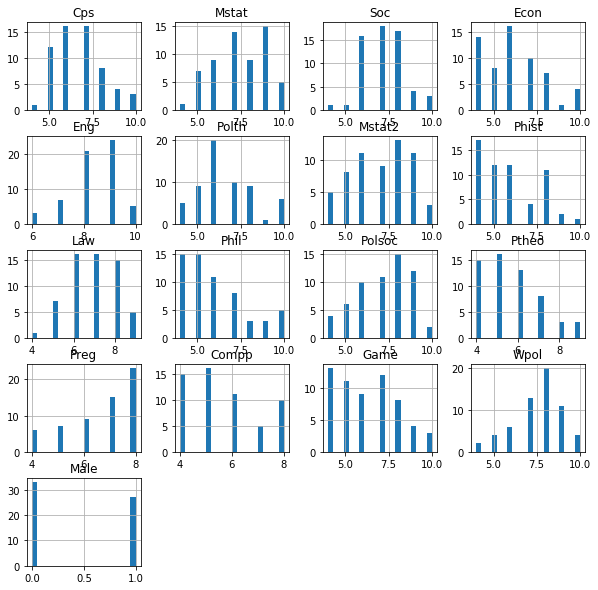

In [28]:
df[df.columns].hist(bins=20,figsize=(10, 10)) # Визуализация значений 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225DDA09348>,
      dtype=object)

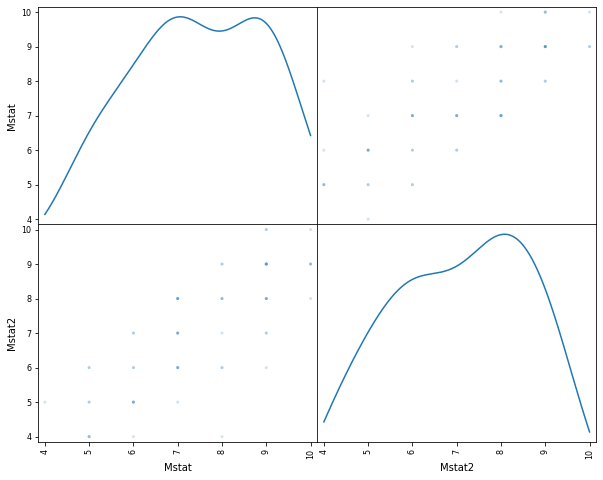

In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Mstat','Mstat2']], alpha = 0.2, figsize=(10, 8), diagonal = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225DDA84588>,
      dtype=object)

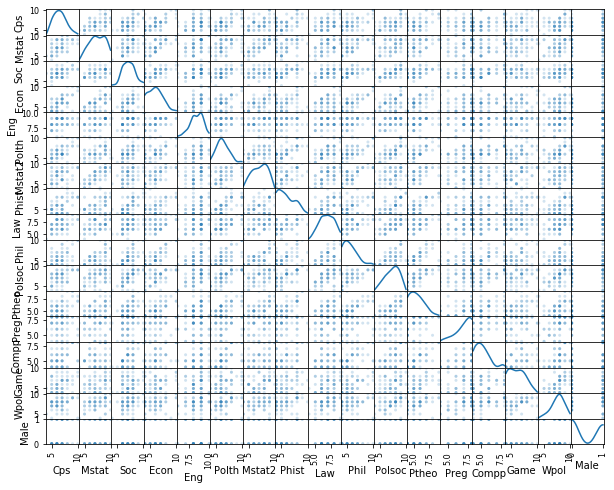

In [38]:
scatter_matrix(df[df.columns], alpha = 0.2, figsize=(10, 8), diagonal = 'kde')

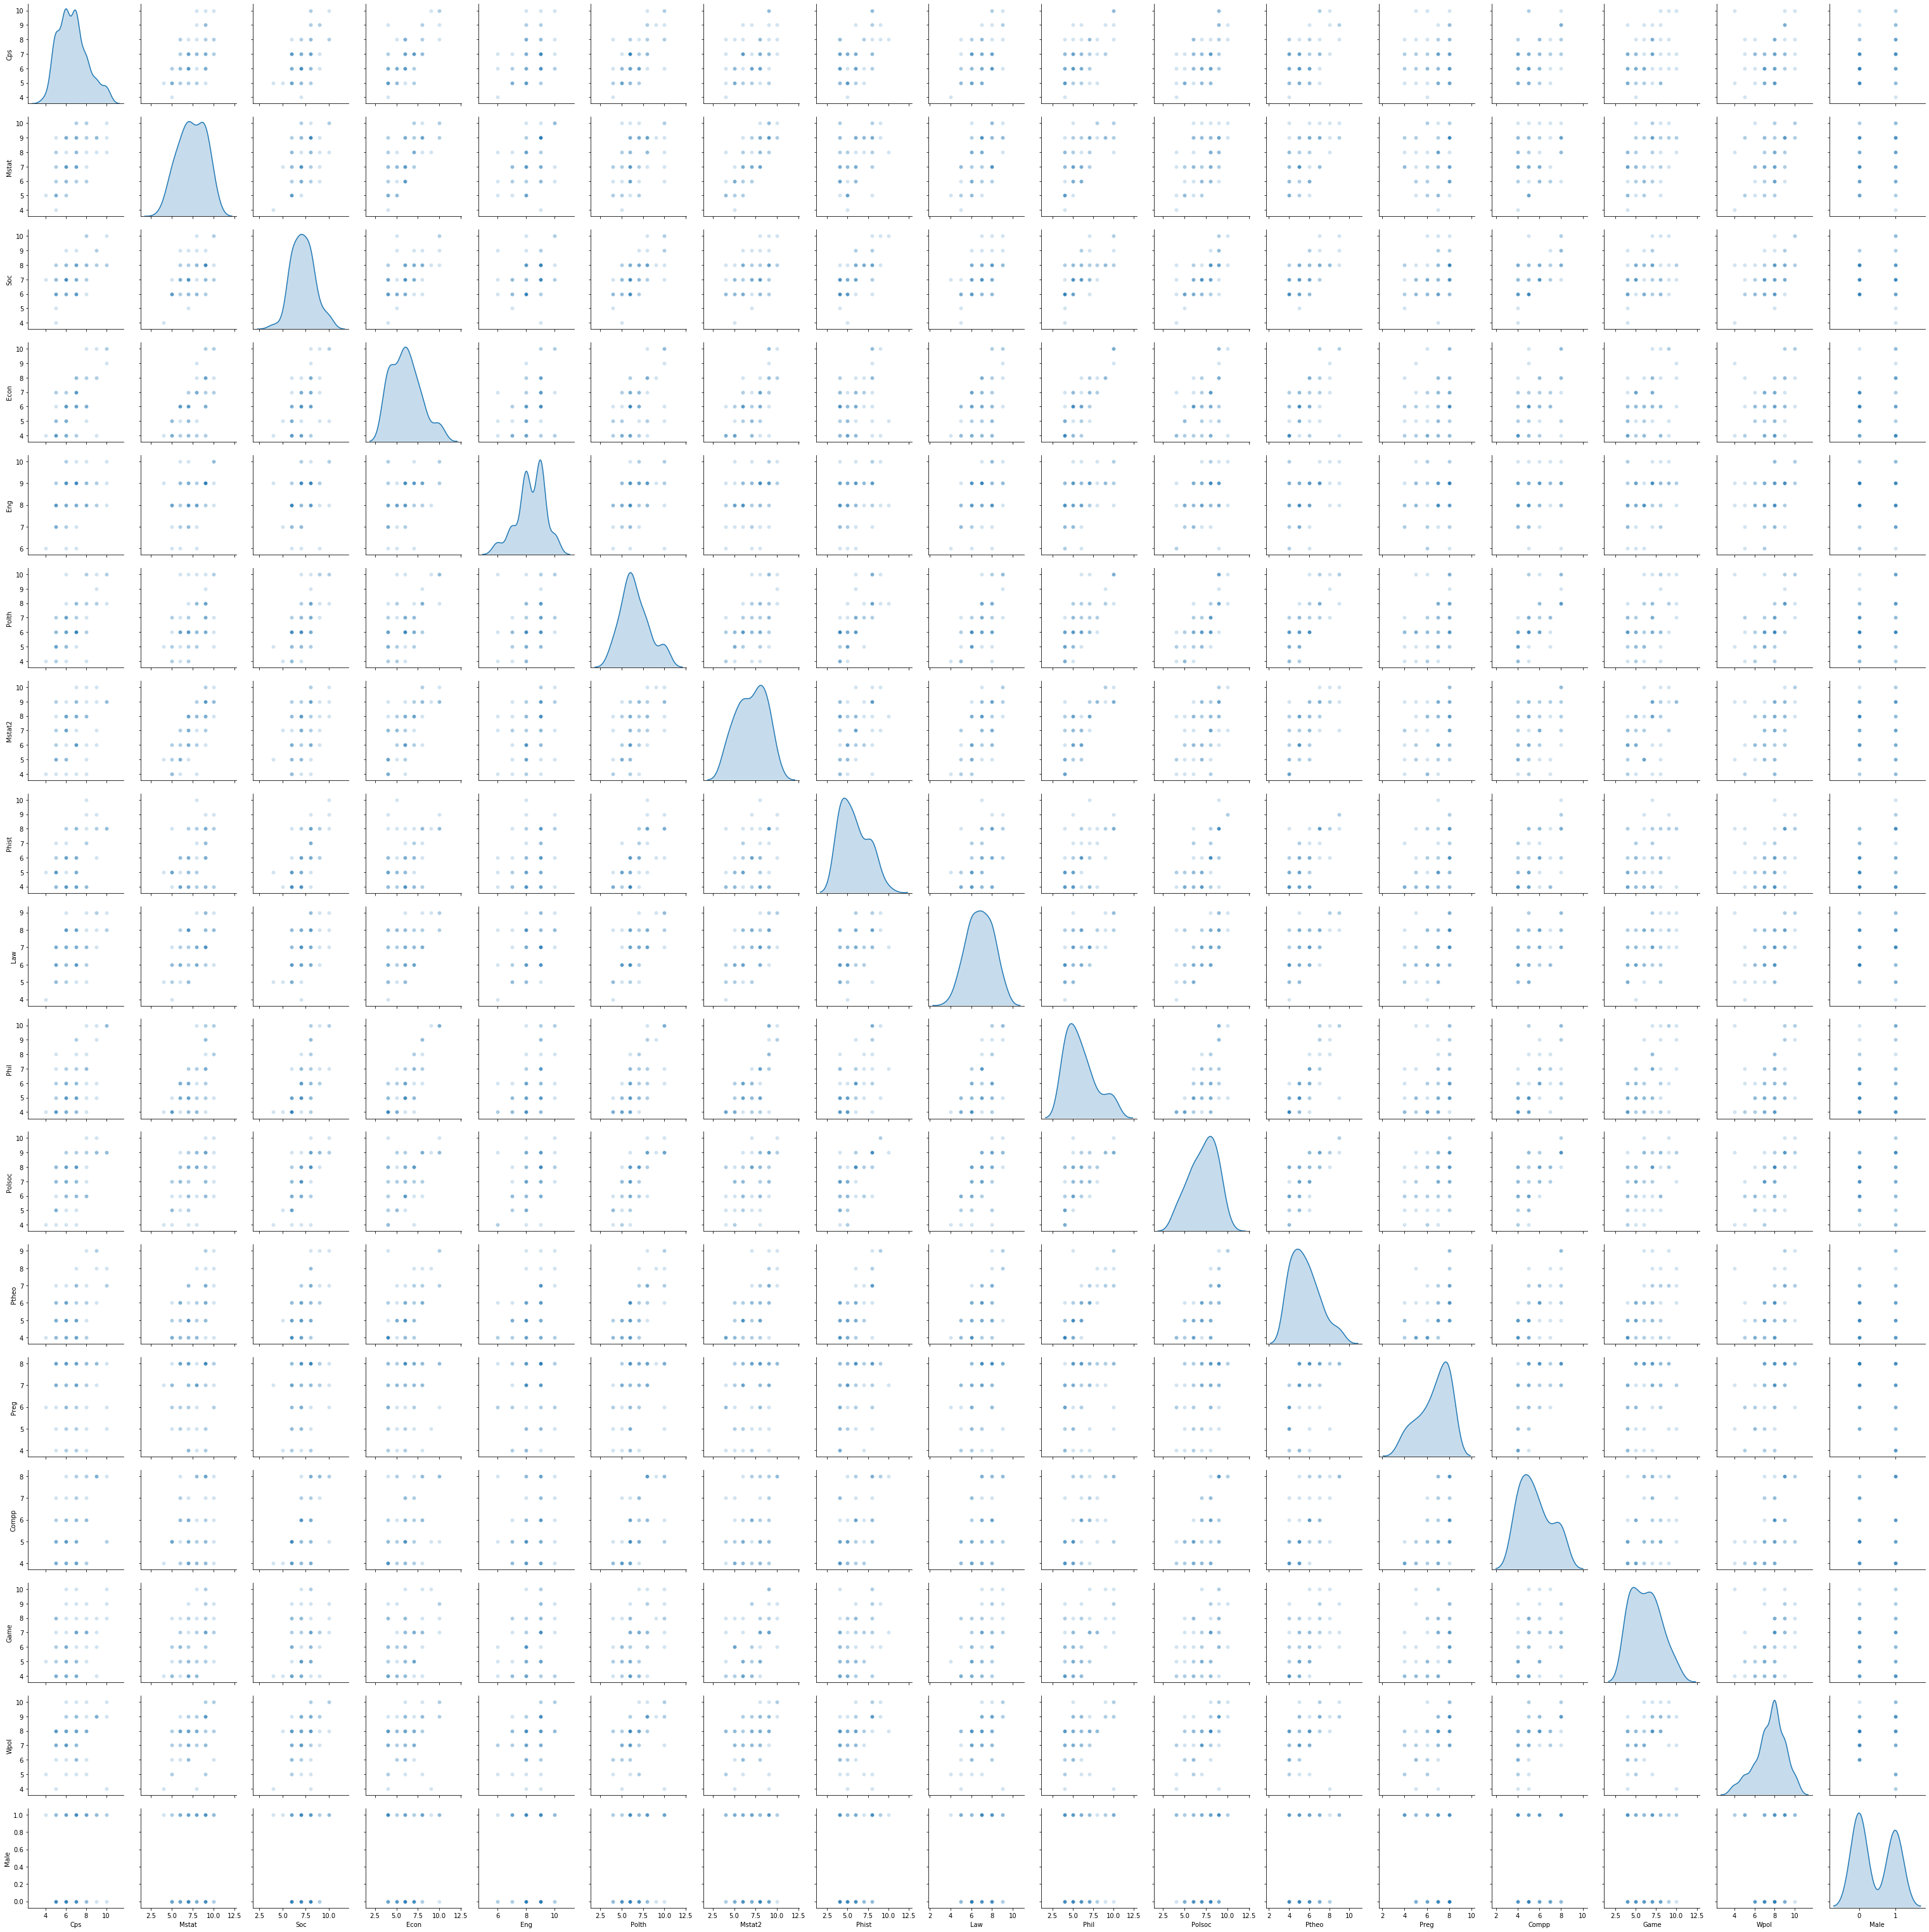

In [33]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2}) #парные графики или матрица диаграмм рассеяния